# Bioenergy from Eurostat's SHARES database

Data from the tsv tables accessed from the [Energy database](https://ec.europa.eu/eurostat/web/energy/data/database) under energy indicators as 'Share of energy from renewable sources until 2020' (nrg_ind_share). Three tsv tables for each sector (electricity, heating and cooling, transport).

I will work on a tidier version of the output csv tables in another notebook.

Very helpful are [Standard international energy product classification (SIEC)](http://dd.eionet.europa.eu/vocabulary/eurostat/siec/) vocabulary and [Energy balance](http://dd.eionet.europa.eu/vocabulary/eurostat/nrg_bal/) vocabulary.

## Fuels
Biomass-based fuels I cover here (SIEC codes in brackets):
* Primary solid biofuels (R5110-5150_W6000RI)
* Biogases (R5300)
* Liquid biofuels (R5200)
* Renewable municipal waste (W6210)

## Variables
If I understand it correctly in the SHARES database in the **electricity sector** I should look for 'Gross electricity generation' for biomass-based fuels, in the **heating sector** it seems as a sum of 'Final consumption in industry and others sectors' and 'Gross heat production' and in the **transport sector** the variables are probably 'Final consumption' variable for road, rail and other sectors.

Depending on the sector (electricity, heating and cooling, transport) we are interested in the following variables:

### Electricity
* Gross electricity production - Renewable Energy Directive (GEP_RED)

### Heating and cooling
* Gross heat production - Renewable Energy Directive (GHP_RED)
* Final consumption - industry and other sectors - energy use (FC_IND_OTH_E)

### Transport
* Final consumption - other transport sector- energy use - Renewable Energy Directive (FC_TRA_OTH_E_RED)
* Final consumption - transport sector - road - energy use - Renewable Energy Directive (FC_TRA_ROAD_E_RED)
* Final consumption - transport sector - rail - energy use - Renewable Energy Directive (FC_TRA_RAIL_E_RED)

Disclaimer: I might got something wrong. I still have to go through the whole [Energy balance guide](https://ec.europa.eu/eurostat/documents/38154/4956218/ENERGY-BALANCE-GUIDE-DRAFT-31JANUARY2019.pdf/cf121393-919f-4b84-9059-cdf0f69ec045).



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
if not os.path.exists('eu'):
    os.mkdir('eu')

In [3]:
# Standard international energy product classification (SIEC)
# https://dd.eionet.europa.eu
# Dictionary from siec codes to human readable labels
siec = pd.read_csv('siec.csv')
siec
fuels_dict = {k: v for k, v in zip(siec['Label'], siec['Notation'])}

In [4]:
# We are interested in renewables and bioenergy
selected_fuels = [
    'Total',
    'Renewables and biofuels',
    'Primary solid biofuels',
    'Biogases',
    'Liquid biofuels',
    'Renewable municipal waste',
    ]

selected_fuels = [
    'Primary solid biofuels',
    'Biogases',
    'Liquid biofuels',
    'Renewable municipal waste',
    ]

selected_fuel_codes = [v for k,v in fuels_dict.items() if k in selected_fuels]

In [5]:
selected_fuel_codes

['R5110-5150_W6000RI', 'R5200', 'R5300', 'W6210']

## Electricity

In [6]:
# The source file is hybrid with tabs and commas as separators
el = pd.read_table('nrg_ind_ured.tsv', delimiter='[\t,]+')
el.rename(columns={'geo\\time': 'geo'}, inplace=True)
el.rename(columns={str(year) + ' ': year for year in range(2004, 2019)}, inplace=True)
el.rename(columns={'2004': 2004}, inplace=True)

In [7]:
el['geo'].unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE',
       'EL', 'ES', 'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE',
       'IS', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL',
       'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK', 'XK'], dtype=object)

In [8]:
el.head()

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,E7000,GEP_NPUMP_MIX,GWH,AL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
1,E7000,GEP_NPUMP_MIX,GWH,AT,3574.539,2958.855,3877.193,3748.451,4375.092,4403.564,4626.926,3100.056,3832.03,4419.345,3832.019,3925.298,3263.976,3965.61,3754.119
2,E7000,GEP_NPUMP_MIX,GWH,BA,336.000,81.000,111.000,242.000,173.000,713.000,239.000,149.000,794.00,386.000,115.000,102.000,316.000,0.00,0.000
3,E7000,GEP_NPUMP_MIX,GWH,BE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
4,E7000,GEP_NPUMP_MIX,GWH,BG,717.301,244.947,444.000,391.000,335.000,296.000,261.000,364.000,670.00,465.000,379.000,374.000,600.000,566.00,464.000


In [9]:
# https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas

needed_fuels = el['siec'].str.fullmatch('|'.join(selected_fuel_codes))
gep = el['nrg_bal'].str.fullmatch('GEP_RED')

In [10]:
el[needed_fuels].sort_values('geo')

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
120,R5110-5150_W6000RI,GEP_RED,GWH,AL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
760,W6210,GEP_RED,GWH,AL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
360,R5300,GEP_RED,GWH,AL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
121,R5110-5150_W6000RI,GEP_RED,GWH,AT,3965.583,3934.744,3783.520,3711.788,3603.280,3817.831,3797.430,3711.060,3590.280,3413.972,3316.313,3163.529,2544.535,1927.129,1699.639
761,W6210,GEP_RED,GWH,AT,335.804,315.521,330.364,302.241,331.019,255.089,239.598,211.580,213.963,214.075,203.972,222.010,210.903,140.273,131.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,R5110-5150_W6000RI,GEP_RED,GWH,UK,23531.535,20541.507,19547.404,19423.316,13823.244,9798.006,6519.247,5478.851,4674.699,3640.980,3062.525,2949.649,3312.922,3374.081,1940.220
398,R5300,GEP_RED,GWH,UK,5700.948,6035.740,6364.272,6463.715,6896.927,6654.688,6442.668,6331.189,6058.803,5565.035,5265.345,5186.358,4881.862,4765.386,4443.856
399,R5300,GEP_RED,GWH,XK,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
159,R5110-5150_W6000RI,GEP_RED,GWH,XK,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [11]:
bioel = el[needed_fuels & gep].groupby(['geo']).sum() * 3.6 / 41.868
bioel = bioel.transpose().sort_index()
bioel

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
2004,0.0,162.548495,0.000000,89.242390,0.000000,0.000000,61.338865,902.751505,249.957008,3412.826569,...,84.500774,132.582115,0.343938,0.000000,616.109372,10.384695,1.719690,6.534824,632.428977,0.0
2005,0.0,204.504041,0.000000,129.754256,0.000000,0.000000,62.916681,1254.686156,272.828891,3845.688822,...,129.933534,144.513586,0.515907,0.000000,638.429579,9.778418,2.751505,2.923474,782.742820,0.0
2006,0.0,272.324076,0.000000,171.917283,0.000000,0.013328,78.948151,1566.380052,263.800516,4435.739553,...,171.349097,146.603095,0.382889,0.000000,697.939381,9.480224,34.248839,4.974205,797.753654,0.0
2007,0.0,342.866122,0.000000,206.660963,0.000000,0.123560,102.773775,2035.167670,266.895959,5055.533534,...,219.739811,160.270593,3.095099,0.000000,831.384351,9.729493,40.756664,8.163543,801.848753,0.0
2008,0.0,354.447979,0.000000,274.071367,1.335512,0.992261,124.598366,2315.391230,269.905417,5654.665950,...,311.111952,159.282631,2.053396,0.000000,879.707137,24.790628,44.453998,12.235168,822.634308,0.0
2009,0.0,364.286328,0.000000,308.628117,0.636457,2.280138,158.939295,2515.305245,285.382631,5969.483491,...,449.127515,179.345744,0.906191,0.000000,961.772141,16.188478,46.173689,21.638091,921.351935,0.0
2010,0.0,382.665348,0.000000,349.250215,3.030009,3.020120,185.940413,2807.050731,394.934394,6793.356664,...,542.011178,224.736801,9.500430,0.000000,1032.837489,18.648065,56.921754,28.624592,1054.364574,0.0
2011,0.0,391.036543,0.000000,384.829923,4.792519,4.437661,232.457008,3139.122958,376.170335,7510.472571,...,653.440327,251.379622,16.912296,0.000000,991.745486,21.646776,70.421324,29.479020,1144.800086,0.0
2012,0.0,402.295787,0.000000,434.486414,5.660103,4.283663,289.914531,3693.637145,382.283061,8353.903439,...,867.932072,253.710662,18.201978,0.515907,1048.065348,22.982803,80.911436,50.896991,1266.967928,0.0
2013,0.0,403.758126,0.000000,417.694583,9.605589,4.201548,349.157868,3888.736028,370.800688,8943.180224,...,741.318659,262.346604,21.603697,1.719776,974.290628,22.335168,78.331900,75.547549,1556.392863,0.0


In [12]:
bioel.sort_index()

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
2004,0.0,162.548495,0.000000,89.242390,0.000000,0.000000,61.338865,902.751505,249.957008,3412.826569,...,84.500774,132.582115,0.343938,0.000000,616.109372,10.384695,1.719690,6.534824,632.428977,0.0
2005,0.0,204.504041,0.000000,129.754256,0.000000,0.000000,62.916681,1254.686156,272.828891,3845.688822,...,129.933534,144.513586,0.515907,0.000000,638.429579,9.778418,2.751505,2.923474,782.742820,0.0
2006,0.0,272.324076,0.000000,171.917283,0.000000,0.013328,78.948151,1566.380052,263.800516,4435.739553,...,171.349097,146.603095,0.382889,0.000000,697.939381,9.480224,34.248839,4.974205,797.753654,0.0
2007,0.0,342.866122,0.000000,206.660963,0.000000,0.123560,102.773775,2035.167670,266.895959,5055.533534,...,219.739811,160.270593,3.095099,0.000000,831.384351,9.729493,40.756664,8.163543,801.848753,0.0
2008,0.0,354.447979,0.000000,274.071367,1.335512,0.992261,124.598366,2315.391230,269.905417,5654.665950,...,311.111952,159.282631,2.053396,0.000000,879.707137,24.790628,44.453998,12.235168,822.634308,0.0
2009,0.0,364.286328,0.000000,308.628117,0.636457,2.280138,158.939295,2515.305245,285.382631,5969.483491,...,449.127515,179.345744,0.906191,0.000000,961.772141,16.188478,46.173689,21.638091,921.351935,0.0
2010,0.0,382.665348,0.000000,349.250215,3.030009,3.020120,185.940413,2807.050731,394.934394,6793.356664,...,542.011178,224.736801,9.500430,0.000000,1032.837489,18.648065,56.921754,28.624592,1054.364574,0.0
2011,0.0,391.036543,0.000000,384.829923,4.792519,4.437661,232.457008,3139.122958,376.170335,7510.472571,...,653.440327,251.379622,16.912296,0.000000,991.745486,21.646776,70.421324,29.479020,1144.800086,0.0
2012,0.0,402.295787,0.000000,434.486414,5.660103,4.283663,289.914531,3693.637145,382.283061,8353.903439,...,867.932072,253.710662,18.201978,0.515907,1048.065348,22.982803,80.911436,50.896991,1266.967928,0.0
2013,0.0,403.758126,0.000000,417.694583,9.605589,4.201548,349.157868,3888.736028,370.800688,8943.180224,...,741.318659,262.346604,21.603697,1.719776,974.290628,22.335168,78.331900,75.547549,1556.392863,0.0


In [13]:
# TJ
bioel_tj = bioel * 41.868

<AxesSubplot:title={'center':'Bioelectricity EU27'}, xlabel='year', ylabel='GEP_RED (ktoe)'>

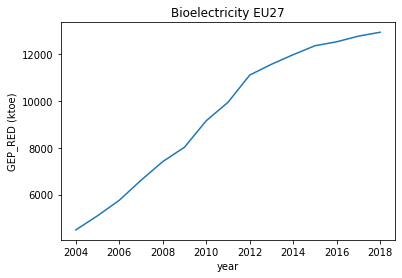

In [14]:
bioel.to_csv(os.path.join(os.path.abspath('datasets'), 'bioelectricity_ktoe.csv'), decimal=','
)
bioel_tj.to_csv(os.path.join(os.path.abspath('datasets'), 'bioelectricity_tj.csv'), decimal=','
)

bioel['EU27_2020'].plot(title='Bioelectricity EU27', ylabel='GEP_RED (ktoe)', xlabel='year')

## Heating and cooling sector

In [15]:
hc = pd.read_table('nrg_ind_urhcd.tsv', delimiter='[\t,]+')
hc.rename(columns={'geo\\time': 'geo'}, inplace=True)
hc.rename(columns={str(year) + ' ': year for year in range(2004, 2019)}, inplace=True)
hc.rename(columns={'2004': 2004}, inplace=True)

for col in range(2004,2019):
    hc[col] = pd.to_numeric(hc[col], errors='coerce')

needed_fuels = hc['siec'].str.fullmatch('|'.join(selected_fuel_codes))
ghp = hc['nrg_bal'].str.fullmatch('GHP_RED')
fc = hc['nrg_bal'].str.fullmatch('FC_IND_OTH_E')
hc[needed_fuels & (fc | ghp)].sort_values('geo')

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,R5110-5150_W6000RI,FC_IND_OTH_E,KTOE,AL,158.710,159.408,175.385,204.333,193.202,201.490,206.506,208.011,205.001,209.993,215.081,214.985,230.032,230.032,233.018
1000,W6210,FC_IND_OTH_E,KTOE,AL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
480,R5300,GHP_RED,KTOE,AL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
440,R5300,FC_IND_OTH_E,KTOE,AL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
40,R5110-5150_W6000RI,GHP_RED,KTOE,AL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,R5300,GHP_RED,KTOE,XK,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
79,R5110-5150_W6000RI,GHP_RED,KTOE,XK,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
39,R5110-5150_W6000RI,FC_IND_OTH_E,KTOE,XK,377.152,371.167,365.888,263.423,251.457,247.659,247.492,241.951,236.338,234.714,233.114,216.323,216.299,216.299,216.299
1039,W6210,FC_IND_OTH_E,KTOE,XK,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [16]:
biohc = hc[needed_fuels & (fc | ghp)].groupby('geo').sum()
biohc = biohc.transpose().sort_index()
biohc

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
2004,233.018,2587.203,182.072,587.464,708.942,4.490,1660.672,7780.453,1573.994,39282.008,...,3935.633,2479.674,3078.293,802.522,6559.783,439.715,344.989,5530.787,482.326,216.299
2005,230.032,2970.871,181.738,674.859,691.315,2.293,1724.586,8130.267,1734.188,41376.655,...,3856.095,2505.207,3183.672,802.522,7013.017,448.983,360.203,5323.899,476.044,216.299
2006,230.032,3188.653,181.499,712.860,735.956,3.344,1779.808,9138.507,1812.937,43294.439,...,3935.846,2521.592,3101.223,802.355,7323.039,429.421,311.671,5126.039,517.030,216.299
2007,214.985,3400.876,181.212,809.355,675.456,5.923,1848.070,9941.721,2016.600,46465.856,...,3920.177,2562.339,3233.735,801.949,7548.677,416.978,409.166,4986.864,580.921,216.323
2008,215.081,3507.179,180.042,946.665,750.549,10.008,1901.356,10864.550,2079.488,49214.624,...,4011.942,2555.651,3796.527,804.242,7524.361,413.418,399.183,4759.076,1217.112,233.114
2009,209.993,3579.236,179.851,1027.348,739.968,21.209,2002.699,10547.005,2120.283,49230.768,...,4159.167,2541.702,3755.684,1055.221,7638.674,583.143,513.639,4580.538,1304.528,234.714
2010,205.001,4029.838,179.253,1165.973,885.880,17.483,2098.164,12800.445,2407.420,53164.347,...,4608.270,2150.879,3944.468,1026.607,8385.260,601.224,536.854,4440.121,1624.749,236.338
2011,208.011,3927.683,178.967,1129.168,946.810,20.660,2162.057,12004.180,2316.364,48825.448,...,4880.243,2161.651,3481.896,1022.070,7939.738,597.592,552.307,3539.935,1525.508,241.951
2012,206.506,4107.815,178.824,1271.306,1007.691,18.534,2285.946,13352.967,2345.785,53999.562,...,5016.791,1756.688,3665.997,1024.577,8472.986,577.147,519.370,3477.859,1765.215,247.492
2013,201.490,4215.282,178.322,1393.117,1026.895,18.296,2474.587,13857.385,2409.527,55865.195,...,5219.068,1837.872,3525.724,1029.450,8213.600,602.609,473.153,3317.259,2259.291,247.659


In [17]:
biohc_tj = biohc * 41.868

<AxesSubplot:title={'center':'Bioheat'}, xlabel='year', ylabel='FC_IND_OTH_E + GHP_RED (ktoe)'>

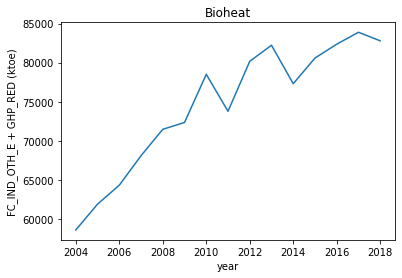

In [18]:
biohc.to_csv(os.path.join(os.path.abspath('eu'), 'bioheat_ktoe.csv'), decimal=',')

biohc_tj.to_csv(os.path.join(os.path.abspath('eu'), 'bioheat_tj.csv'), decimal=',')

biohc['EU27_2020'].plot(title='Bioheat', ylabel='FC_IND_OTH_E + GHP_RED (ktoe)', xlabel='year')

## Transport

In [19]:
tr = pd.read_table('nrg_ind_urtd.tsv', delimiter='[\t,]+')
tr.rename(columns={'geo\\time': 'geo'}, inplace=True)
tr.rename(columns={str(year) + ' ': year for year in range(2004, 2019)}, inplace=True)
tr.rename(columns={'2004': 2004}, inplace=True)

for col in range(2004,2019):
    tr[col] = pd.to_numeric(tr[col], errors='coerce')

needed_fuels = tr['siec'].str.fullmatch('|'.join(selected_fuel_codes))
selected_variables = ['FC_TRA_OTH_E_RED', 'FC_TRA_RAIL_E_RED', 'FC_TRA_ROAD_E_RED']
fc = tr['nrg_bal'].str.fullmatch('|'.join(selected_variables))

tr[needed_fuels & fc].sort_values('geo')

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
360,R5200,FC_TRA_OTH_E_RED,KTOE,AL,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1760,R5300,FC_TRA_RAIL_E_RED,KTOE,AL,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1720,R5300,FC_TRA_OTH_E_RED,KTOE,AL,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,R5200,FC_TRA_ROAD_E_RED,KTOE,AL,125.0,87.87,81.896,30.266,25.815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,R5200,FC_TRA_RAIL_E_RED,KTOE,AL,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,R5300,FC_TRA_OTH_E_RED,KTOE,XK,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,R5200,FC_TRA_RAIL_E_RED,KTOE,XK,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399,R5200,FC_TRA_OTH_E_RED,KTOE,XK,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1799,R5300,FC_TRA_RAIL_E_RED,KTOE,XK,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
biotr = tr[needed_fuels & fc].groupby('geo').sum()
biotr = biotr.transpose().sort_index()
biotr

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
2004,0.000,0.000,0.0,0.000,0.000,0.000,0.000,907.973,0.000,1683.464,...,13.543,0.000,0.000,0.0,150.243,0.000,1.00,0.0,16.452,0.0
2005,0.000,73.767,0.0,0.000,0.000,0.000,0.000,1828.151,0.000,2945.828,...,49.664,0.000,0.000,0.0,166.257,0.000,11.17,0.0,68.765,0.0
2006,0.000,256.063,0.0,0.000,5.428,0.000,0.000,3343.699,3.826,4869.842,...,90.592,71.628,0.000,0.0,233.845,4.080,40.17,0.0,180.274,0.0
2007,0.000,322.095,0.0,0.000,2.323,0.000,0.000,3795.572,5.739,6784.091,...,96.699,121.876,0.000,0.0,308.778,13.769,59.49,0.0,348.951,0.0
2008,0.000,395.209,0.0,0.000,4.180,14.140,109.941,2971.506,5.102,7857.697,...,437.060,125.566,0.000,0.0,372.057,24.568,72.27,0.0,805.255,0.0
2009,0.000,511.115,0.0,132.023,3.747,15.023,194.779,2632.849,8.684,9053.048,...,635.888,208.095,0.000,0.0,395.306,29.687,84.45,0.0,988.163,0.0
2010,0.000,495.423,0.0,358.076,13.409,15.023,231.251,2897.800,26.784,10178.658,...,867.425,309.130,0.000,0.0,429.843,44.606,96.59,0.0,1150.334,0.0
2011,0.000,497.781,0.0,346.646,16.760,15.907,300.110,2844.810,130.489,10506.932,...,915.535,293.076,195.990,0.0,452.321,34.991,100.27,0.0,1063.649,0.0
2012,0.000,490.963,0.0,345.177,83.886,15.907,275.270,2968.806,226.605,11218.357,...,807.349,273.296,178.310,0.0,516.848,50.971,94.15,0.0,896.752,0.0
2013,0.000,502.293,0.0,342.601,101.543,15.023,277.109,2708.922,226.605,9708.107,...,747.531,261.388,203.450,0.0,598.194,57.987,102.11,0.0,1047.487,0.0


In [21]:
biotr_tj = biotr * 41.868
biotr_tj

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
2004,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,38015.013564,0.000000,70483.270752,...,567.018324,0.000000,0.000000,0.0,6290.373924,0.000000,41.86800,0.0,688.812336,0.0
2005,0.000000,3088.476756,0.0,0.000000,0.000000,0.000000,0.000000,76541.026068,0.000000,123335.926704,...,2079.332352,0.000000,0.000000,0.0,6960.848076,0.000000,467.66556,0.0,2879.053020,0.0
2006,0.000000,10720.845684,0.0,0.000000,227.259504,0.000000,0.000000,139993.989732,160.186968,203890.544856,...,3792.905856,2998.921104,0.000000,0.0,9790.622460,170.821440,1681.83756,0.0,7547.711832,0.0
2007,0.000000,13485.473460,0.0,0.000000,97.259364,0.000000,0.000000,158913.008496,240.280452,284036.321988,...,4048.593732,5102.704368,0.000000,0.0,12927.917304,576.480492,2490.72732,0.0,14609.880468,0.0
2008,0.000000,16546.610412,0.0,0.000000,175.008240,592.013520,4603.009788,124411.013208,213.610536,328986.057996,...,18298.828080,5257.197288,0.000000,0.0,15577.282476,1028.613024,3025.80036,0.0,33714.416340,0.0
2009,0.000000,21399.362820,0.0,5527.538964,156.879396,628.982964,8155.007172,110232.121932,363.581712,379033.013664,...,26623.358784,8712.521460,0.000000,0.0,16550.671608,1242.935316,3535.75260,0.0,41372.408484,0.0
2010,0.000000,20742.370164,0.0,14991.925968,561.408012,628.982964,9682.016868,121325.090400,1121.392512,426160.053144,...,36317.349900,12942.654840,0.000000,0.0,17996.666724,1867.564008,4044.03012,0.0,48162.183912,0.0
2011,0.000000,20841.094908,0.0,14513.374728,701.707680,665.994276,12565.005480,119106.505080,5463.313452,439904.228976,...,38331.619380,12270.505968,8205.709320,0.0,18937.775628,1465.003188,4198.10436,0.0,44532.856332,0.0
2012,0.000000,20555.638884,0.0,14451.870636,3512.139048,665.994276,11525.004360,124297.969608,9487.498140,469690.170876,...,33802.087932,11442.356928,7465.483080,0.0,21639.392064,2134.053828,3941.87220,0.0,37545.212736,0.0
2013,0.000000,21030.003324,0.0,14344.018668,4251.402324,628.982964,11601.999612,113417.146296,9487.498140,406459.023876,...,31297.627908,10943.792784,8518.044600,0.0,25045.186392,2427.799716,4275.14148,0.0,43856.185716,0.0


<AxesSubplot:title={'center':'Biotransport'}, xlabel='year', ylabel=' FC_TRA_ROAD_E_RED (ktoe)'>

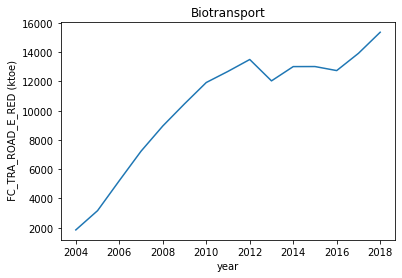

In [22]:
biotr.to_csv(os.path.join(os.path.abspath('eu'), 'biotrans_ktoe.csv'), decimal=',')
biotr_tj.to_csv(os.path.join(os.path.abspath('eu'),'biotrans_tj.csv'), decimal=',')

biotr['EU27_2020'].plot(title='Biotransport', ylabel=' FC_TRA_ROAD_E_RED (ktoe)', xlabel='year')

## Bioenergy (all sectors)

<AxesSubplot:title={'center':'Bioenergy'}, xlabel='year', ylabel=' Bioenergy from SHARES (ktoe)'>

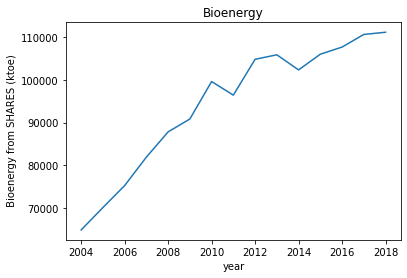

In [23]:
bioenergy = bioel + biohc + biotr
bioenergy_tj = bioenergy * 41.868

bioenergy.to_csv(os.path.join(os.path.abspath('eu'), 'bioenergy_ktoe.csv'), decimal=',')
bioenergy_tj.to_csv(os.path.join(os.path.abspath('eu'), 'bioenergy_tj.csv'), decimal=',')

bioenergy['EU27_2020'].plot(title='Bioenergy', ylabel=' Bioenergy from SHARES (ktoe)', xlabel='year')